In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition, manifold

In [2]:
def load_data():
    iris = datasets.load_iris()
    return iris.data, iris.target

**MDS多维缩放模型**

In [3]:
def test_MDS(*data):
    X,y = data
    for n in [4,3,2,1]:
        mds = manifold.MDS(n_components = n)
        mds.fit(X)
        print('stress(n_components=%d):%s'%(n,str(mds.stress_)))

In [4]:
X,y = load_data()
test_MDS(X,y)

stress(n_components=4):11.161885843633911
stress(n_components=3):17.971919916841262
stress(n_components=2):203.9579165536015
stress(n_components=1):990.5305682670244


绘制降维后样本分布函数：

In [11]:
def plot_MDS(*data):
    X,y = data
    mds = manifold.MDS(n_components = 2)
    X_r = mds.fit_transform(X)
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    for label,color in zip(np.unique(y), colors):
        position = y == label
        ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label,color = color)
    
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()

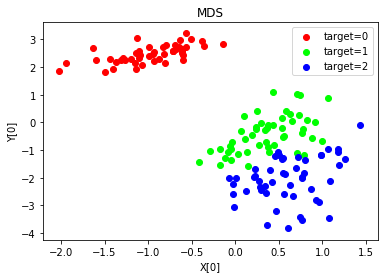

In [12]:
X,y = load_data()
plot_MDS(X,y)

___

**Isomap等度量映射降维：**

In [15]:
def test_Isomap(*data):
    X,y = data
    for n in [4,3,2,1]:
        isomap = manifold.Isomap(n_components = n)
        isomap.fit(X)
        print('reconstruction_error(n_components=%d):%s'%(n,isomap.reconstruction_error()))

In [16]:
X,y = load_data()
test_Isomap(X,y)

reconstruction_error(n_components=4):1.0097180068081733
reconstruction_error(n_components=3):1.0182845146289827
reconstruction_error(n_components=2):1.0276983764330463
reconstruction_error(n_components=1):1.0716642763207656


现在绘制降维后的样本分布图：

In [35]:
def plot_Isomap_k(*data):
    X,y = data
    Ks = [1,5,25,y.size-1]
    fig=plt.figure()
    for i,k in enumerate(Ks):
        isomap=manifold.Isomap(n_components=2,n_neighbors=k) ## 当n=1时，需要换成下面注释的那个句子，二选一 
        X_r=isomap.fit_transform(X)
        
        ax = fig.add_subplot(2,2,i+1)
        colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
        for label,color in zip(np.unique(y),colors):
            position = y ==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d" %label,color=color)
            ##ax.scatter(X_r[position],np.zeros_like(X_r[position]),label="target=%d" %label,color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("Isomap")
    plt.show()

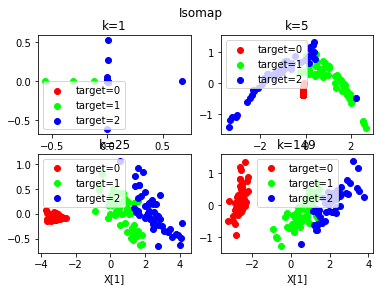

In [36]:
X,y = load_data()
plot_Isomap_k(X,y)

___

**LLE局部线性嵌入：**

In [37]:
def test_LocallyLinearEmbedding(*data):
    X,y = data
    for n in [4,3,2,1]:
        lle = manifold.LocallyLinearEmbedding(n_components = n)
        lle.fit(X)
        print('reconstruction_error(n_components=%d):%s'%(n,lle.reconstruction_error_))

In [38]:
X,y = load_data()
test_LocallyLinearEmbedding(X,y)

reconstruction_error(n_components=4):7.199368740868793e-07
reconstruction_error(n_components=3):3.8706050375530896e-07
reconstruction_error(n_components=2):6.64142072876353e-08
reconstruction_error(n_components=1):-4.120518900921194e-15


绘制降维后的样本分布图：

In [43]:
def plot_LocallyLinearEmbedding(*data):
    X,y = data
    Ks = [1,5,25,y.size-1]
    
    fig=plt.figure()
    for i,k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=k) ## 当n=1时，需要换成下面注释的那个句子，二选一 
        X_r=lle.fit_transform(X)
        
        ax = fig.add_subplot(2,2,i+1)
        colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
        for label,color in zip(np.unique(y),colors):
            position = y ==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d" %label,color=color)
            ##ax.scatter(X_r[position],np.zeros_like(X_r[position]),label="target=%d" %label,color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()

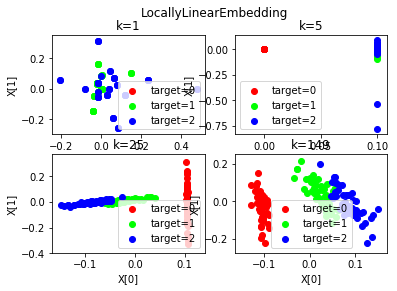

In [44]:
X,y = load_data()
plot_LocallyLinearEmbedding(X,y)